Link for course page - https://jovian.com/learn/machine-learning-with-python-zero-to-gbms/assignment/assignment-2-decision-trees-and-random-forests 

# House Price Prediction with Decision Trees and Random Forests

# 1 - Problem Statement

Predict the price of a house using information like its location, area, no. of rooms etc. with Decision Trees and Random Forests

Link for dataset and info - https://www.kaggle.com/c/house-prices-advanced-regression-techniques

In [10]:
!pip install opendatasets scikit-learn plotly folium --upgrade --quiet
!pip install pandas numpy matplotlib seaborn --quiet

# 2 - Downloading the data

In [28]:
import os                               # Module to work with system files on your PC
from zipfile import ZipFile             # Module to work with zip files
from urllib.request import urlretrieve  # Module to download files from the intrenet

In [32]:
dataset_url = 'https://github.com/JovianML/opendatasets/raw/master/data/house-prices-advanced-regression-techniques.zip'
urlretrieve(dataset_url, 'house-prices.zip')  # Download file from the url and save is as 'house-prices.zip' on your PC

('house-prices.zip', <http.client.HTTPMessage at 0x2dcb6587210>)

In [36]:
with ZipFile('house-prices.zip') as f:  # open zip file
    f.extractall(path='house-prices')   # extract files from zip archive to directory 'house-prices'

In [42]:
os.listdir('house-prices')  # list of names of files in directory from your PC

['data_description.txt', 'sample_submission.csv', 'test.csv', 'train.csv']

In [44]:
import pandas as pd

pd.options.display.max_columns = 200
pd.options.display.max_rows = 200

prices_df = pd.read_csv('house-prices/train.csv')
prices_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,

# 3 - Exploratory Data Analysis and Visualization

## 3.1 - Exploratory Data Analysis

In [49]:
n_rows, n_cols = prices_df.shape
print(f'The dataset contains {n_rows} rows and {n_cols} columns.')

The dataset contains 1460 rows and 81 columns.


In [53]:
prices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

There are some columns with missing values that we need to fix later

In [70]:
print(f'There are {len(set(prices_df.dtypes))} unique data types in data set: {set(prices_df.dtypes)}')

There are 3 unique data types in data set: {dtype('float64'), dtype('O'), dtype('int64')}


In [55]:
prices_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [73]:
!pip install plotly matplotlib seaborn --quiet

In [77]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
# all outputs are below code cells and not in a pop-up window
%matplotlib inline 

In [79]:
# Change the default style and font sizes for charts.
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## 3.2 - Visualization

### 3.2.1 - Target Value Distibution

__SalePrice__ is our target value ( the value that we will predict)

D:\conda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='SalePrice', ylabel='Count'>

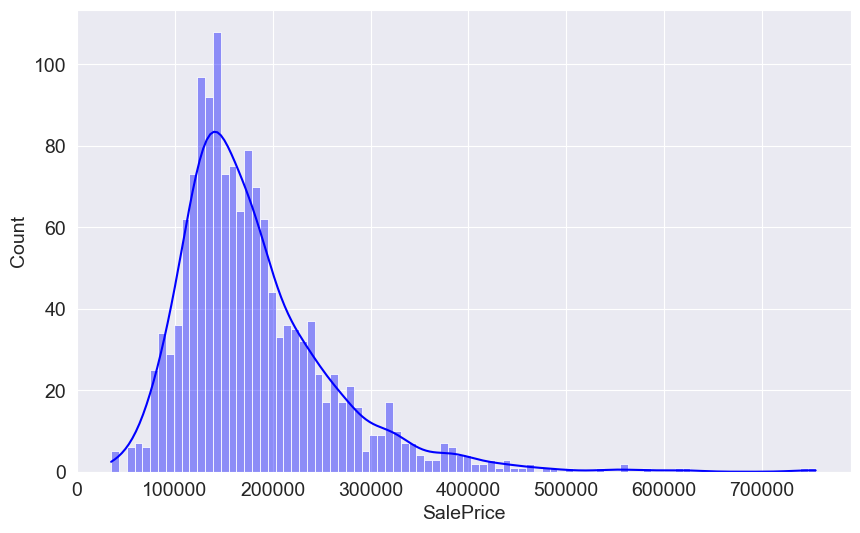

In [109]:
plt.figure()
sns.histplot(prices_df['SalePrice'], color='b', bins=90, kde=True, alpha=0.4)  # bins = 90 is number of bins (intervals) in histogram
                                                                               # kde = True adds a Kernel Density Estimation curve
                                                                               # alpha=0.4 is the level of transperency of histogram bins

### 3.2.2 - Numerical values distribution

In [158]:
import numpy as np

numerical_columns_for_visualization = prices_df.select_dtypes(include=np.number).columns.tolist()
numerical_columns_for_visualization.remove('Id')
numerical_columns_for_visualization.remove('SalePrice')
numerical_df_prices = prices_df[numerical_columns_for_visualization]
numerical_df_prices

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,1999.0,2,460,0,40,0,0,0,0,0,8,2007
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,1978.0,2,500,349,0,0,0,0,0,0,2,2010
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1941.0,1,252,0,60,0,0,0,0,2500,5,2010
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,0,1078,1078,0,0,1078,1,0,1,0,2,1,5,0,1950.0,1,240,366,0,112,0,0,0,0,4,2010


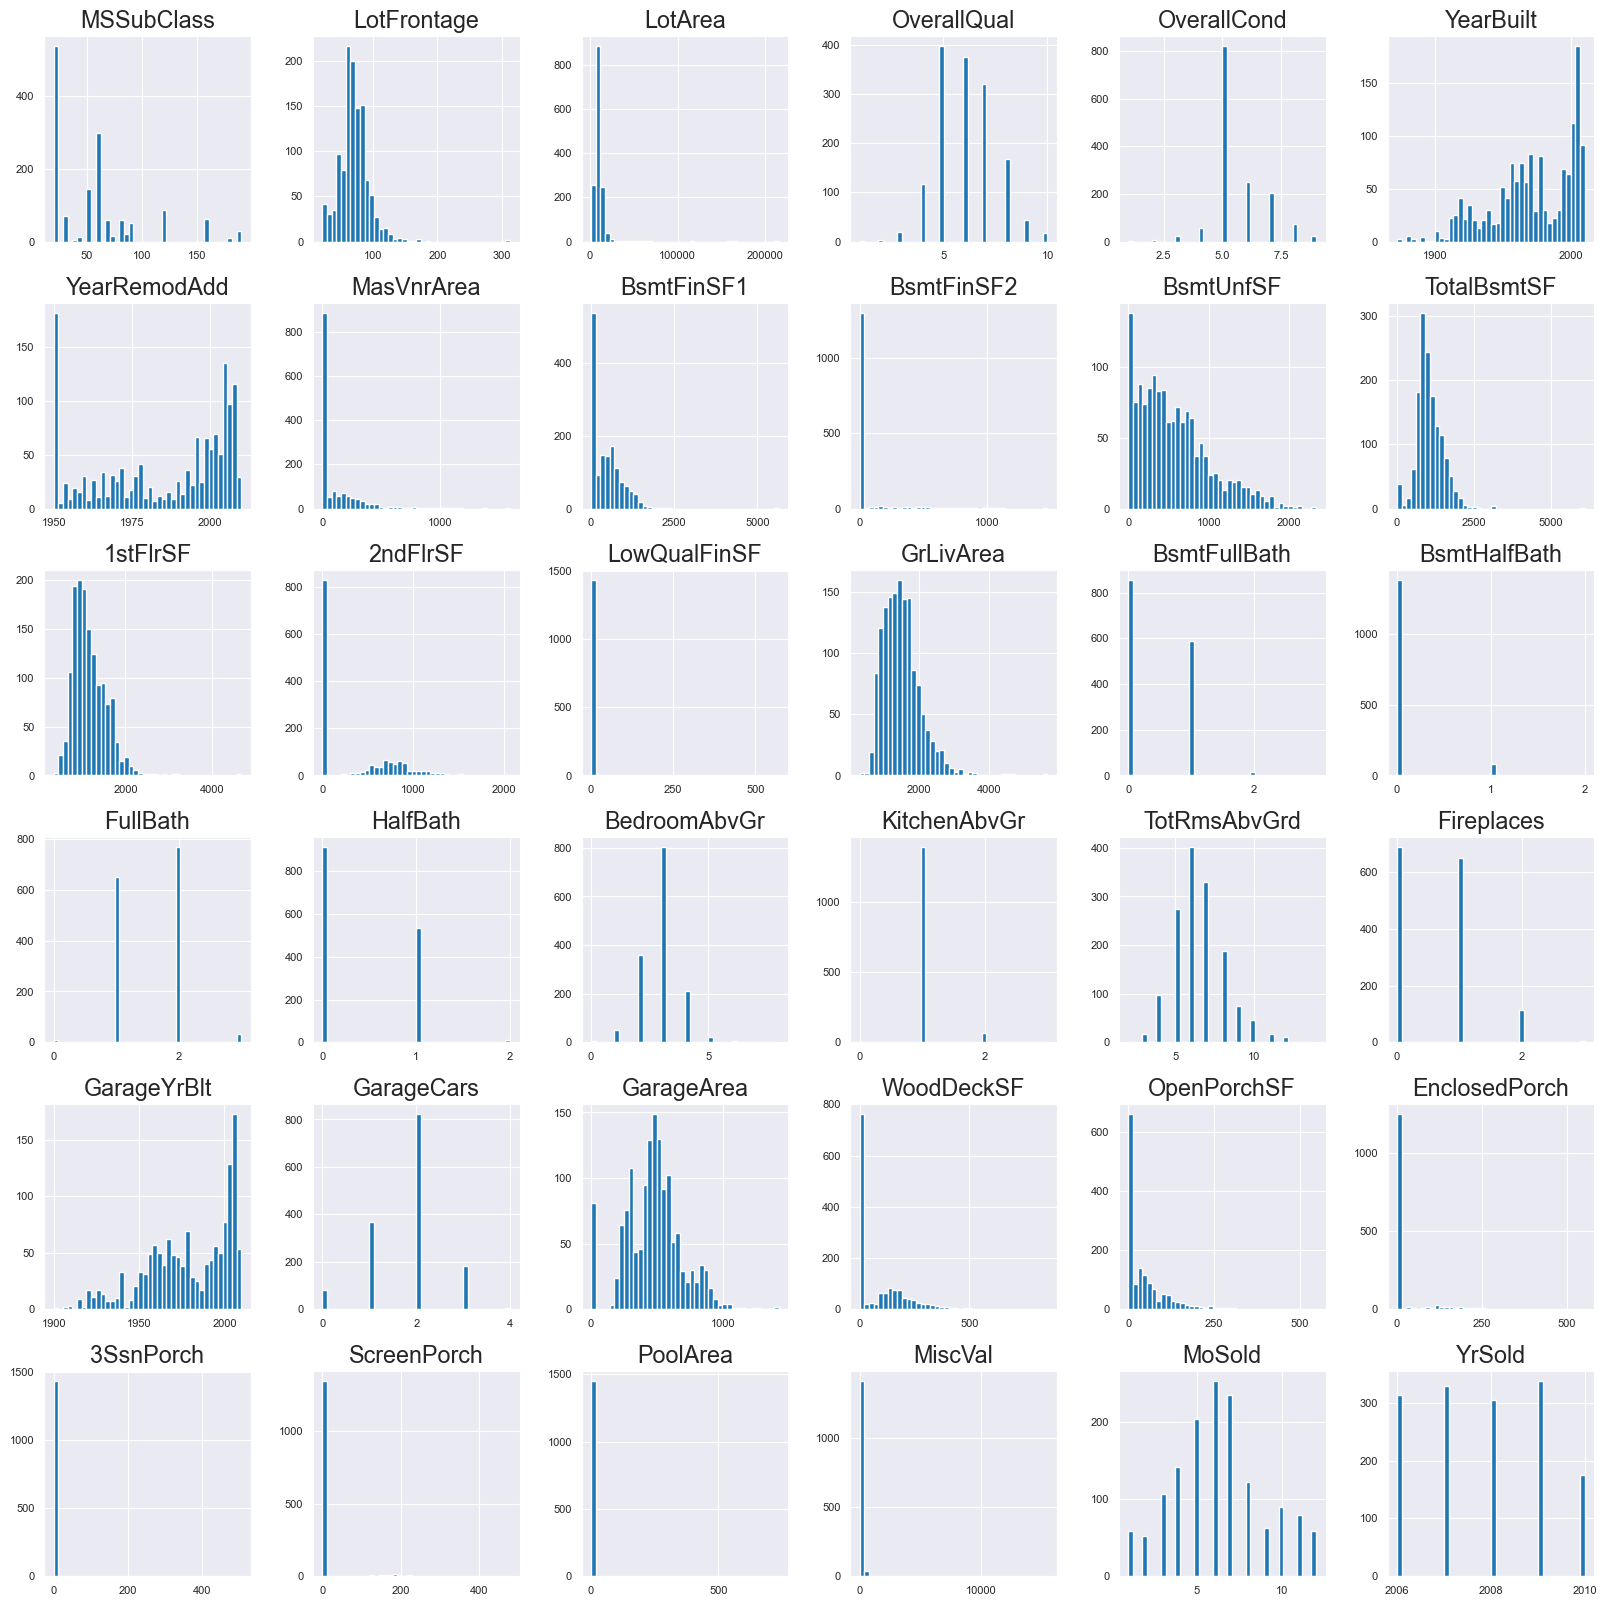

In [160]:
numerical_df_prices.hist(figsize=(20, 20), bins=40, xlabelsize=8, ylabelsize=8)
plt.show()

# 4 - Preparing the Data for Training

## 4.1 - Input and Target Columns

In [193]:
input_cols = prices_df.columns[1:-1]
target_col = prices_df.columns[-1]

In [199]:
inputs_df = prices_df[input_cols].copy()
targets = prices_df[target_col].copy()

## 4.2 - Imputing numerical values

In [202]:
# Identify numeric and categorical columns
numeric_cols = prices_df[input_cols].select_dtypes(include=np.number).columns.tolist()
categorical_cols = prices_df[input_cols].select_dtypes(include='object').columns.tolist()

In [207]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer().fit(inputs_df[numeric_cols])
inputs_df[numeric_cols] = imputer.transform(inputs_df[numeric_cols])

## 4.3 - Scaling numerical values

In [209]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(inputs_df[numeric_cols])
inputs_df[numeric_cols] = scaler.transform(inputs_df[numeric_cols])

## 4.4 - One-Hot Encoding Categorical values

In [219]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore').fit(inputs_df[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
inputs_df[encoded_cols] = encoder.transform(inputs_df[categorical_cols])

C:\Users\user\AppData\Local\Temp\ipykernel_12664\3285572433.py:5: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\user\AppData\Local\Temp\ipykernel_12664\3285572433.py:5: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\user\AppData\Local\Temp\ipykernel_12664\3285572433.py:5: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented fra

## 4.5 - Train and Validation sets

In [224]:
from sklearn.model_selection import train_test_split

train_inputs, val_inputs, train_targets, val_targets = train_test_split(inputs_df[numeric_cols + encoded_cols],
                                                                        targets,
                                                                        test_size=0.25,
                                                                        random_state=42)

# 5 - Decision Tree

## 5.1 Training Decision Tree

In [235]:
from sklearn.tree import DecisionTreeRegressor

In [241]:
# Create the model
tree = DecisionTreeRegressor(random_state=42)

In [251]:
# Fit the model to the training data
tree.fit(train_inputs, train_targets)

DecisionTreeRegressor(random_state=42)

## 5.2 - Generating Predictions and Evaluating the Model

In [255]:
from sklearn.metrics import mean_squared_error

In [262]:
tree_train_preds = tree.predict(train_inputs)
tree_train_preds

array([191000., 181000., 105000., ..., 115000., 189950., 174000.])

In [266]:
tree_train_mse = mean_squared_error(train_targets, tree_train_preds)
tree_train_rmse = np.sqrt(tree_train_mse)
tree_train_rmse

0.0

In [276]:
tree_val_preds = tree.predict(val_inputs)
tree_val_preds

array([158500., 430000., 109900., 146500., 325000.,  81000., 180000.,
       148500.,  85500., 141500., 189950., 128500., 102000., 164990.,
       172400., 109000., 213000., 139000., 108000., 214000., 143000.,
       287090., 174000., 110000., 230000., 179200., 227680., 112000.,
       172400., 171750., 112500., 233000., 189000., 110000., 256300.,
       129500.,  91500., 215000., 290000., 116000., 112500., 263000.,
       110000., 325624., 143250., 139000., 105000., 125500., 426000.,
       133900., 110000., 170000., 110000., 538000., 140000., 175500.,
       190000., 142000., 135000., 110000.,  60000., 168500., 361919.,
       325000., 249700., 193500., 108000., 440000., 123600., 150000.,
       118964., 110000., 110000.,  90000., 485000., 179200., 290000.,
       320000., 139000., 125000.,  83000.,  76000., 143250.,  62383.,
       158000., 135000., 270000., 170000., 136500., 200141., 135000.,
       161750., 138500., 294000., 115000., 185000., 130000., 151000.,
       279500., 2150

In [280]:
tree_val_mse = mean_squared_error(val_targets, tree_val_preds)
tree_val_rmse = np.sqrt(tree_val_mse)
tree_val_rmse

39797.73339484453

In [282]:
print('Train RMSE: {}, Validation RMSE: {}'.format(tree_train_rmse, tree_val_rmse))

Train RMSE: 0.0, Validation RMSE: 39797.73339484453


There is overfitting, our model just simply memorized all the outputs in training set, and poorly performs on unseen data

## 5.3 - Visualizing Decision Tree

In [291]:
from sklearn.tree import plot_tree, export_text

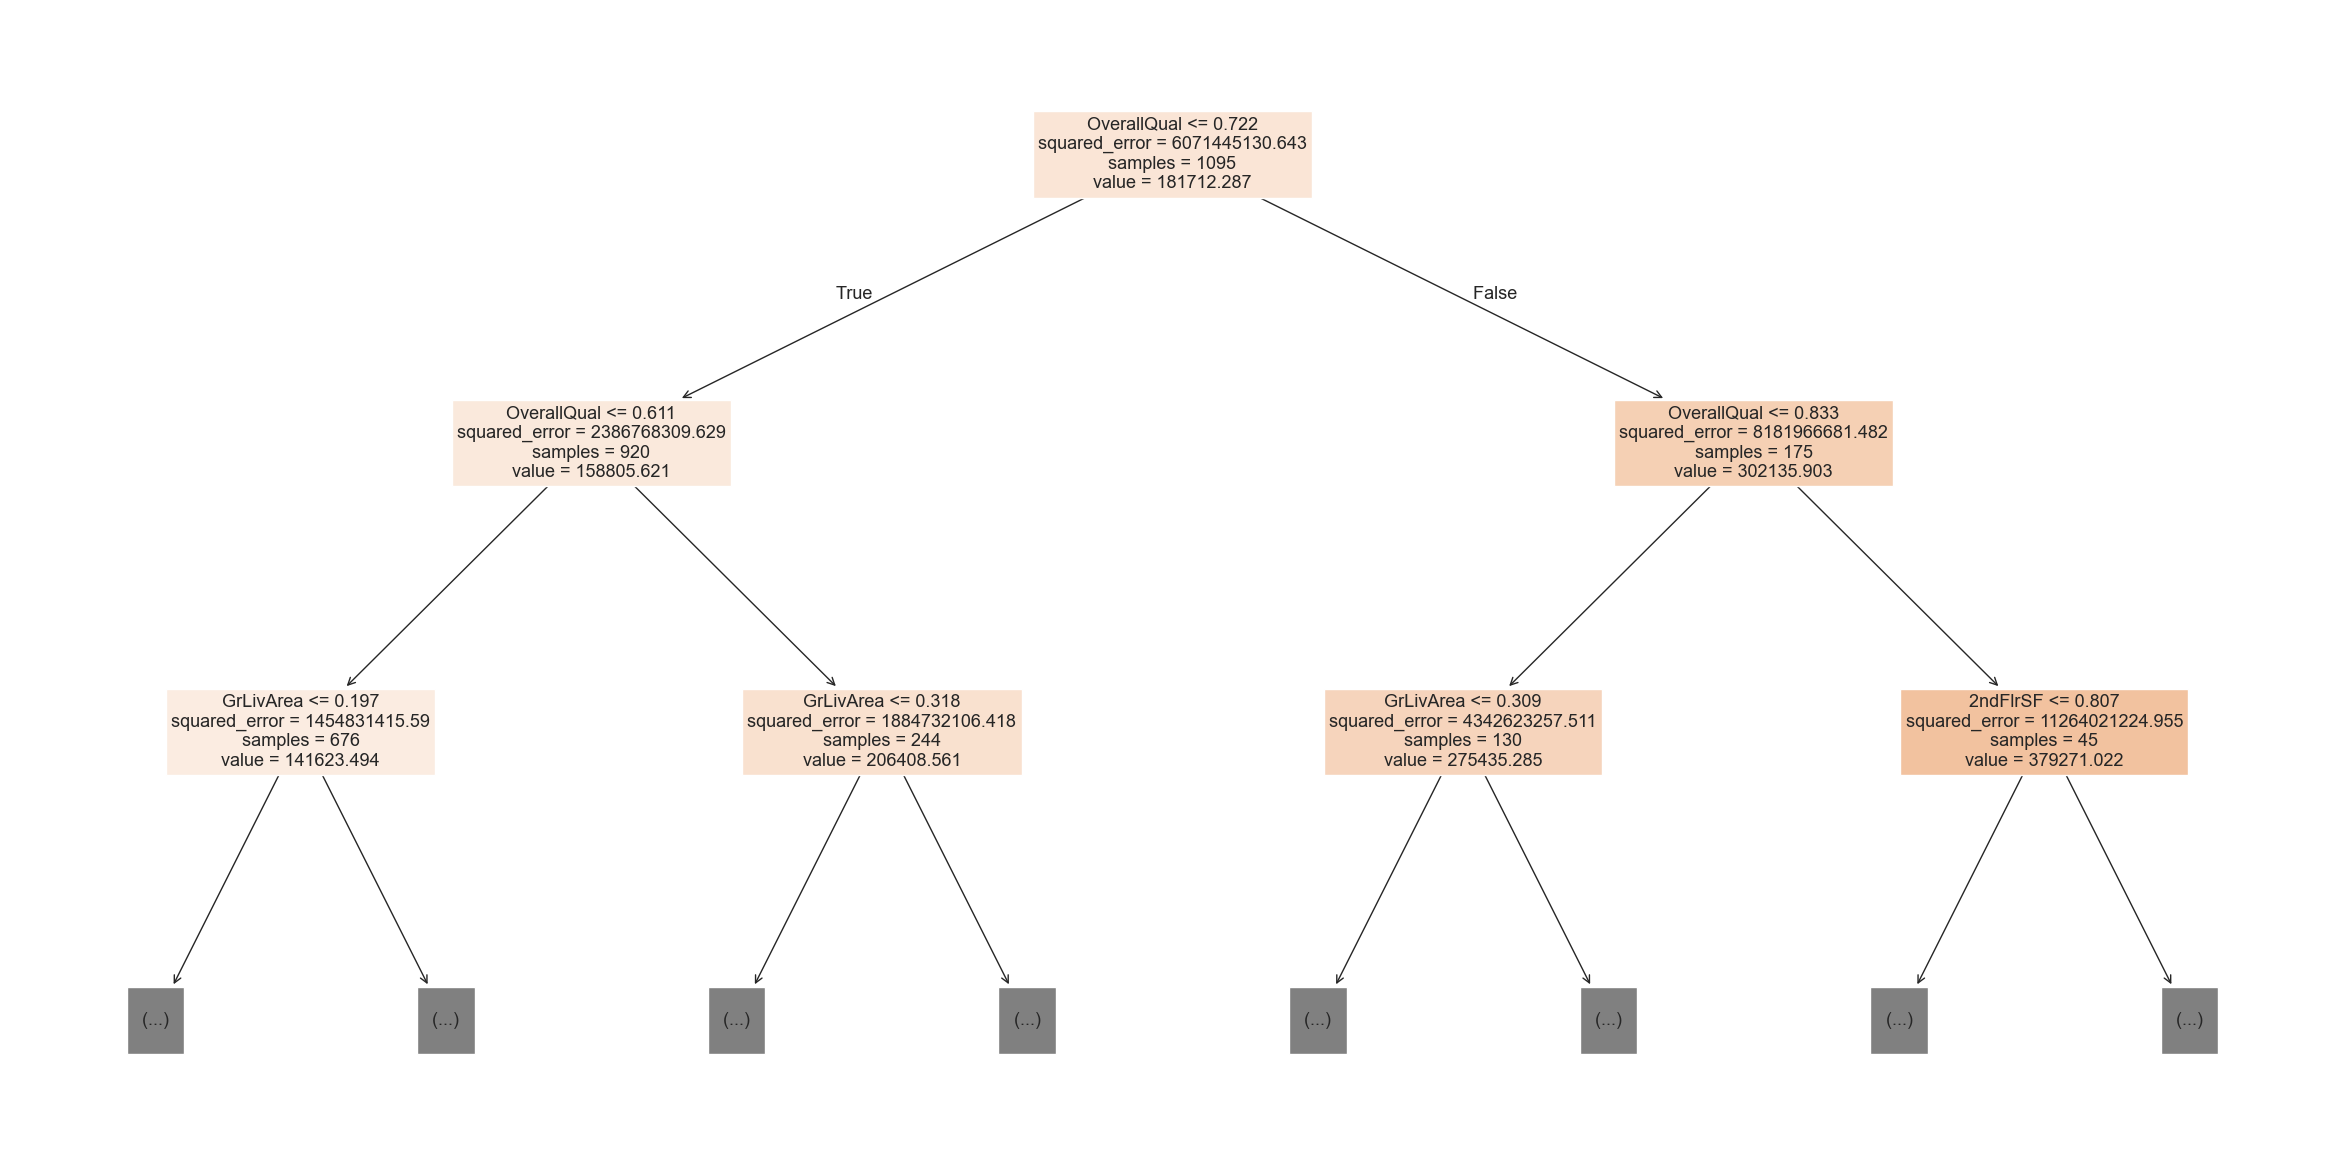

In [293]:
plt.figure(figsize=(30,15))
plot_tree(tree, feature_names=train_inputs.columns, max_depth=2, filled=True);

In [295]:
tree.tree_.max_depth

20

In [299]:
tree_text = export_text(tree, max_depth=10, feature_names=list(train_inputs.columns))
print(tree_text[:2000])

|--- OverallQual <= 0.72
|   |--- OverallQual <= 0.61
|   |   |--- GrLivArea <= 0.20
|   |   |   |--- TotalBsmtSF <= 0.16
|   |   |   |   |--- OverallQual <= 0.39
|   |   |   |   |   |--- GarageCond_TA <= 0.50
|   |   |   |   |   |   |--- LotArea <= 0.04
|   |   |   |   |   |   |   |--- CentralAir_N <= 0.50
|   |   |   |   |   |   |   |   |--- Functional_Maj2 <= 0.50
|   |   |   |   |   |   |   |   |   |--- FireplaceQu_nan <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- HouseStyle_2Story <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- value: [100000.00]
|   |   |   |   |   |   |   |   |   |   |--- HouseStyle_2Story >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- value: [97000.00]
|   |   |   |   |   |   |   |   |   |--- FireplaceQu_nan >  0.50
|   |   |   |   |   |   |   |   |   |   |--- LotArea <= 0.03
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 4
|   |   |   |   |   |   |   |   |   |   |--- LotArea >  0.03
|   |   |   |   |   |   

## 5.4 Feature Importance

In [305]:
tree_importances = tree.feature_importances_
tree_importances

array([2.58388122e-03, 1.79661361e-02, 7.12845452e-03, 6.32441398e-01,
       5.12081634e-03, 4.52325202e-03, 2.70087524e-03, 1.49057303e-03,
       2.57311567e-02, 1.16471936e-04, 2.29031779e-03, 2.80337345e-02,
       2.89728982e-02, 3.10728417e-02, 0.00000000e+00, 1.04394148e-01,
       1.02819965e-04, 1.69217911e-07, 2.70748657e-06, 7.84393180e-07,
       6.99412131e-04, 0.00000000e+00, 2.49953531e-03, 9.92177842e-04,
       7.99142557e-03, 4.67028327e-03, 1.53494168e-02, 4.30840877e-03,
       9.21040028e-03, 5.91321648e-05, 0.00000000e+00, 3.01365759e-03,
       0.00000000e+00, 1.00195805e-05, 7.70098489e-03, 6.50727993e-04,
       0.00000000e+00, 0.00000000e+00, 1.20365498e-04, 2.25303595e-05,
       2.50693201e-08, 2.71352828e-05, 0.00000000e+00, 1.69217911e-07,
       2.95381438e-06, 6.88780380e-06, 5.32705504e-05, 6.23755637e-06,
       0.00000000e+00, 1.67256073e-05, 5.18627837e-04, 0.00000000e+00,
       5.44004246e-06, 2.07713105e-04, 0.00000000e+00, 0.00000000e+00,
      

In [309]:
tree_importance_df = pd.DataFrame({
    'feature': train_inputs.columns,
    'importance': tree_importances
}).sort_values('importance', ascending=False)

tree_importance_df

,feature,importance
3,OverallQual,0.632441
15,GrLivArea,0.104394
13,2ndFlrSF,0.031073
12,1stFlrSF,0.028973
11,TotalBsmtSF,0.028034
...,...,...
144,Exterior1st_Stucco,0.000000
149,Exterior2nd_AsphShn,0.000000
152,Exterior2nd_CBlock,0.000000
155,Exterior2nd_ImStucc,0.000000


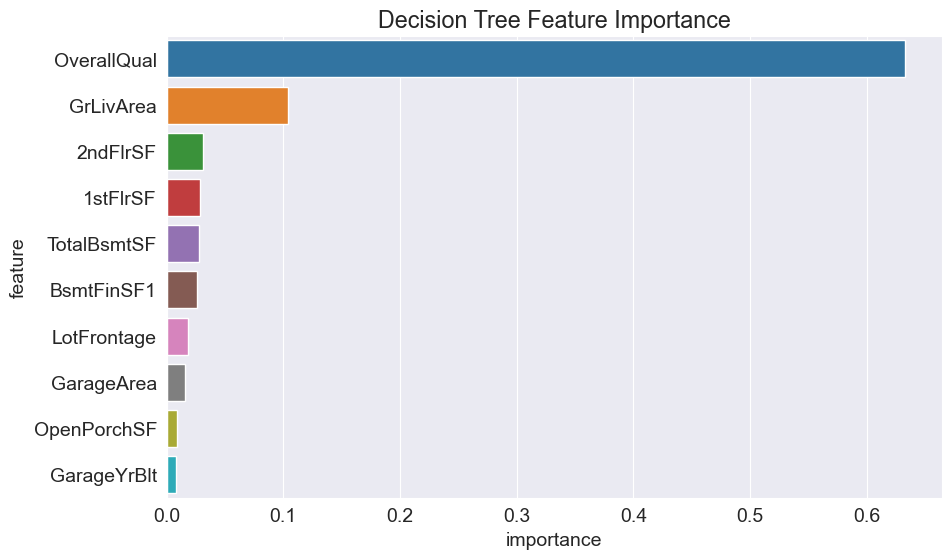

In [311]:
plt.title('Decision Tree Feature Importance')
sns.barplot(data=tree_importance_df.head(10), x='importance', y='feature');

# 6 - Random Forests

## 6.1 Training a Random Forest

In [316]:
from sklearn.ensemble import RandomForestRegressor

In [318]:
# Create the model
rf1 = RandomForestRegressor(n_jobs=-1, random_state=42)

In [320]:
rf1.fit(train_inputs, train_targets)

RandomForestRegressor(n_jobs=-1, random_state=42)

## 6.2 - Generating Predictions and Evaluating the Model

In [324]:
rf1_train_preds = rf1.predict(train_inputs)
rf1_train_preds

array([191126.39, 173664.5 , 108812.  , ..., 116653.  , 180295.  ,
       180217.5 ])

In [326]:
rf1_train_mse = mean_squared_error(train_targets, rf1_train_preds)
rf1_train_rmse = np.sqrt(rf1_train_mse)
rf1_train_rmse

12066.521075000881

In [328]:
rf1_val_preds = rf1.predict(val_inputs)
rf1_val_preds

array([142852.75, 315026.24, 119725.  , 151991.  , 319433.5 ,  86239.  ,
       206831.4 , 152245.5 ,  84862.  , 129465.01, 156757.9 , 120997.83,
       109916.5 , 208643.39, 176608.5 , 128995.  , 192787.51, 136477.  ,
       118061.5 , 209316.4 , 163542.63, 227068.12, 179962.89, 122483.  ,
       198570.13, 171969.37, 185256.96, 104896.33, 178224.87, 193743.57,
       125701.39, 251511.28, 173727.54, 111610.5 , 253371.41, 145290.5 ,
       136913.61, 201638.77, 319658.73, 106836.65, 122392.  , 239164.59,
       118918.83, 378757.68, 135909.  , 150552.  , 115304.16, 124808.5 ,
       401819.43, 145185.34, 121310.5 , 203387.9 , 124644.65, 339425.94,
       138380.2 , 236252.42, 193507.65, 153024.5 , 143313.1 , 111286.99,
        75602.  , 149502.5 , 309561.77, 277694.64, 286423.81, 219699.86,
       113779.5 , 307980.81, 114084.  , 166272.39, 128340.16, 130309.  ,
       112745.  ,  92000.5 , 445099.3 , 175989.61, 303833.66, 302070.84,
       136965.5 , 125366.6 ,  99257.  ,  97352.08, 

In [330]:
rf1_val_mse = mean_squared_error(val_targets, rf1_val_preds)
rf1_val_rmse = np.sqrt(rf1_val_mse)
rf1_val_rmse

27902.228160605046

In [332]:
print('Train RMSE: {}, Validation RMSE: {}'.format(rf1_train_rmse, rf1_val_rmse))

Train RMSE: 12066.521075000881, Validation RMSE: 27902.228160605046


## 6.3 - Visualazing Random Forests

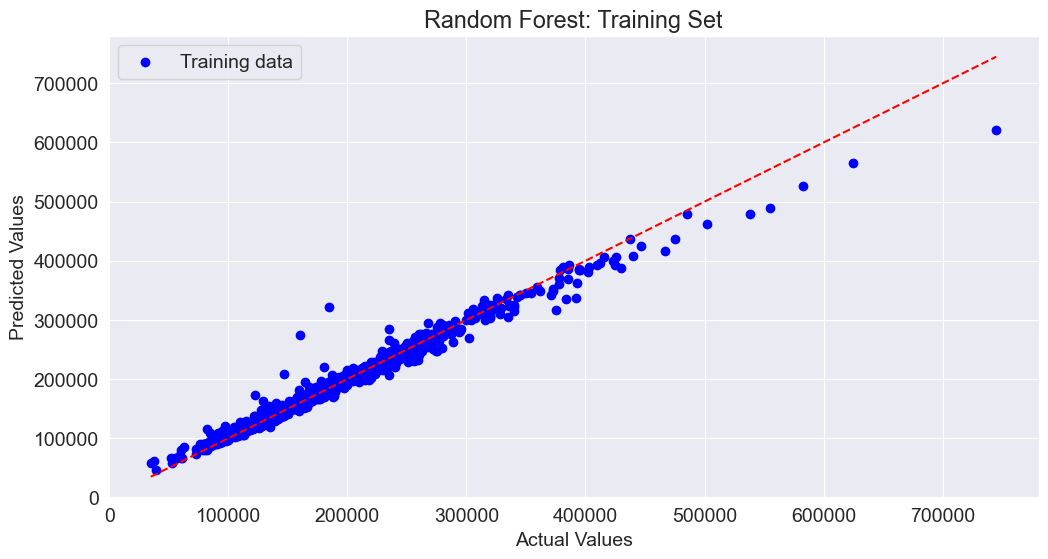

In [350]:
# Plotting the training set
plt.figure(figsize=(12, 6))
plt.scatter(train_targets, rf1_train_preds, color='blue', label='Training data')
plt.plot([min(train_targets), max(train_targets)], [min(train_targets), max(train_targets)], linestyle='--', color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest: Training Set')
plt.legend()
plt.grid(True)
plt.show()

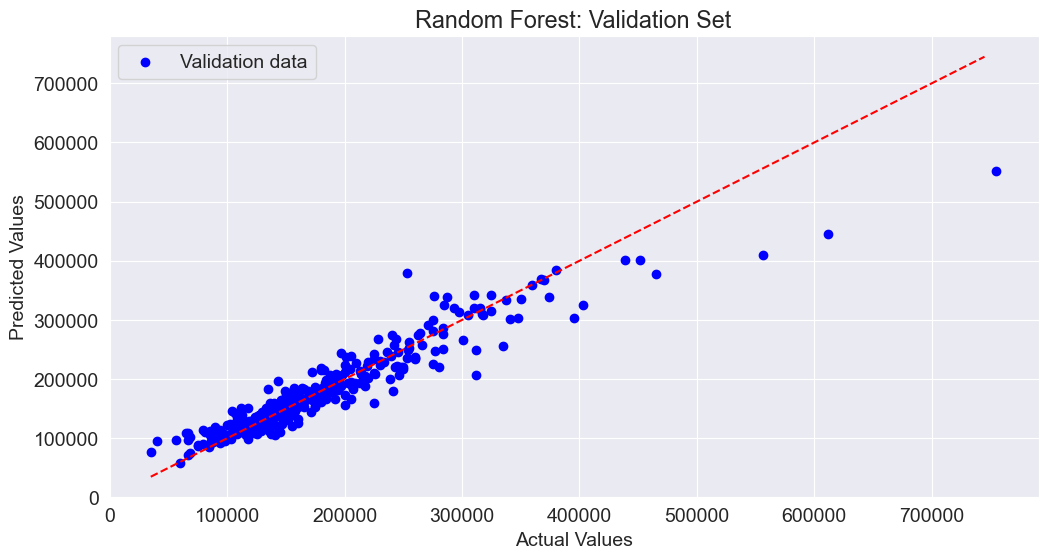

In [354]:
# Plotting the validation set
plt.figure(figsize=(12, 6))
plt.scatter(val_targets, rf1_val_preds, color='blue', label='Validation data')
plt.plot([min(train_targets), max(train_targets)], [min(train_targets), max(train_targets)], linestyle='--', color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest: Validation Set')
plt.legend()
plt.grid(True)
plt.show()

## 6.4 - Feature Importance

In [359]:
rf1_importance_df = pd.DataFrame({
    'feature': train_inputs.columns,
    'importance': rf1.feature_importances_
}).sort_values('importance', ascending=False)

rf1_importance_df.head(10)

,feature,importance
3,OverallQual,0.553164
15,GrLivArea,0.119348
11,TotalBsmtSF,0.034287
13,2ndFlrSF,0.029574
12,1stFlrSF,0.027192
8,BsmtFinSF1,0.027053
25,GarageCars,0.021322
2,LotArea,0.015574
26,GarageArea,0.014780
5,YearBuilt,0.012097


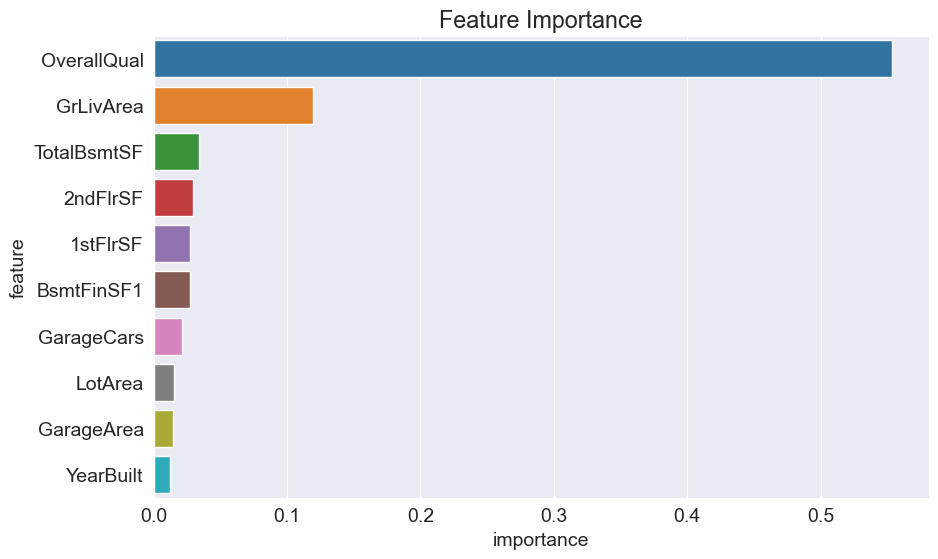

In [361]:
plt.title('Feature Importance')
sns.barplot(data=rf1_importance_df.head(10), x='importance', y='feature');

# 7 - Hyperparameters Tuning

In [511]:
from sklearn.metrics import root_mean_squared_error

def test_params(**params):
    model = RandomForestRegressor(random_state=42, n_jobs=-1, **params).fit(train_inputs, train_targets)
    train_rmse = root_mean_squared_error(model.predict(train_inputs), train_targets)
    val_rmse = root_mean_squared_error(model.predict(val_inputs), val_targets)
    return train_rmse, val_rmse

In [513]:
test_params(n_estimators=20, max_depth=20)

(13473.161389650968, 28556.357550718698)

In [515]:
test_params(n_estimators=50, max_depth=10, min_samples_leaf=4, max_features=0.4)

(20162.62017526119, 28760.24228057591)

In [517]:
def test_param_and_plot(param_name, param_values):
    train_errors, val_errors = [], []
    lowest_val_rmse = 100_000_000
    lowest_train_rmse = 100_000_000
    lowest_index = 100_000
    for i, value in enumerate(param_values):
        params = {param_name: value}
        train_rmse, val_rmse = test_params(**params)
        if val_rmse < lowest_val_rmse:
            lowest_val_rmse = val_rmse
            lowest_train_rmse = train_rmse
            lowest_index = param_values[i]
        train_errors.append(train_rmse)
        val_errors.append(val_rmse)
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, val_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('RMSE')
    plt.legend(['Training', 'Validation'])

    print(f'Best Value of Hyperparameter: \n{param_name} = {lowest_index} \ntrain_RMSE = {lowest_train_rmse} \nval_RMSE = {lowest_val_rmse}')

Best Value of Hyperparameter: 
max_depth = 20 
train_RMSE = 12069.429212283436 
val_RMSE = 27614.099642402165


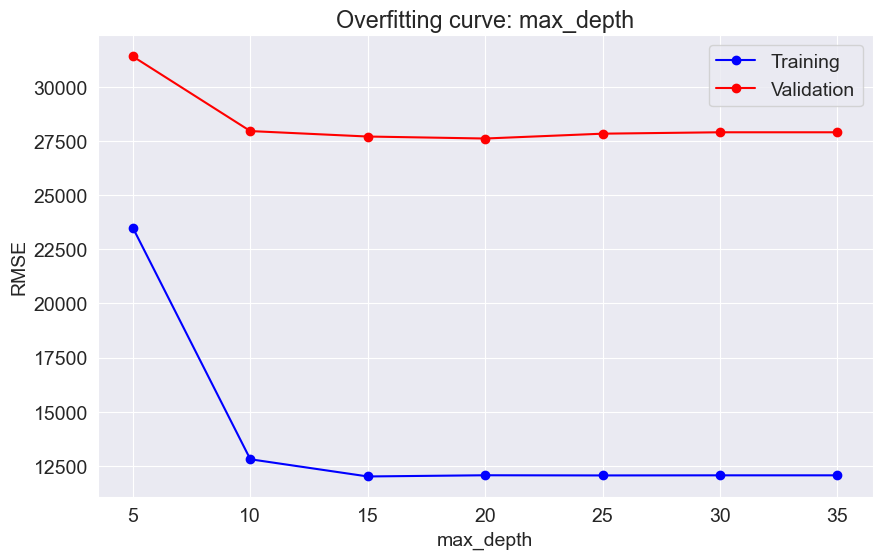

In [519]:
test_param_and_plot('max_depth', [5, 10, 15, 20, 25, 30, 35])

From the above graph, it appears that the best value for max_depth is around 20, beyond which the model starts to overfit.

## 7.1 Selecting Hyperparameters for tuning

In [522]:
?RandomForestRegressor

Init signature:
RandomForestRegressor(
    n_estimators=100,
    *,
    criterion='squared_error',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=1.0,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    ccp_alpha=0.0,
    max_samples=None,
    monotonic_cst=None,
)
Docstring:     
A random forest regressor.

A random forest is a meta estimator that fits a number of decision tree
regressors on various sub-samples of the dataset and uses averaging to
improve the predictive accuracy and control over-fitting.
Trees in the forest use the best split strategy, i.e. equivalent to passing
`splitter="best"` to the underlying :class:`~sklearn.tree.DecisionTreeRegressor`.
The sub-sample size is controlled with the `max_samples` parameter if
`bootstrap=True` (default), otherwise the whole dataset is use

Hyperparameters to tune:  
n_estimators, max_depth, min_samples_split, min_samples_leaf, min_weight_fraction_leaf, max_features, max_leaf_nodes, min_impurity_decrease

out strategy is:
1) Tune the 1st parameter
2) with saved 1st parameter, tune next
3) repeat the process
4) (optional: return to step 1 and retune all parameter 1 by 1)

In [527]:
# Let's create a base model with which we can compare models with tuned hyperparameters.
base_model = RandomForestRegressor(random_state=42, n_jobs=-1).fit(train_inputs, train_targets)
base_train_rmse = root_mean_squared_error(base_model.predict(train_inputs), train_targets)
base_val_rmse = root_mean_squared_error(base_model.predict(val_inputs), val_targets)
base_accs = base_train_rmse, base_val_rmse
base_accs

(12066.521075000881, 27902.228160605046)

## 7.2 n_estimators

This argument controls the number of decision trees in the random forest. The default value is 100. For larger datasets, it helps to have a greater number of estimators. As a general rule, try to have as few estimators as needed.

Best Value of Hyperparameter: 
n_estimators = 76 
train_RMSE = 12106.483608521496 
val_RMSE = 27752.591203718952


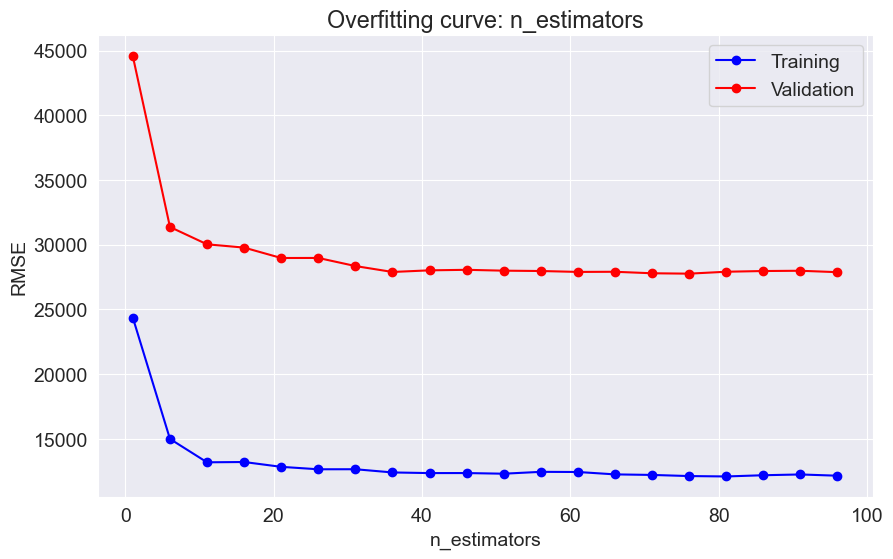

In [531]:
test_param_and_plot('n_estimators', list(range(1,100,5)))

In [533]:
base_accs

(12066.521075000881, 27902.228160605046)

In [537]:
# change the hyperparameters of model in function 
def test_params(**params):
    model = RandomForestRegressor(random_state=42, n_jobs=-1, n_estimators = 76,  **params).fit(train_inputs, train_targets)
    train_rmse = root_mean_squared_error(model.predict(train_inputs), train_targets)
    val_rmse = root_mean_squared_error(model.predict(val_inputs), val_targets)
    return train_rmse, val_rmse

# Let's create a temp best model to compare models with other tuned hyperparameters.
temp_best_model = RandomForestRegressor(random_state=42, n_jobs=-1, n_estimators = 76).fit(train_inputs, train_targets)
temp_best_train_rmse = root_mean_squared_error(temp_best_model.predict(train_inputs), train_targets)
temp_best_val_rmse = root_mean_squared_error(temp_best_model.predict(val_inputs), val_targets)
temp_best_accs = temp_best_train_rmse, temp_best_val_rmse
temp_best_accs

(12106.483608521496, 27752.591203718952)

## 7.3 max_depth

Best Value of Hyperparameter: 
max_depth = 15 
train_RMSE = 12220.009271250921 
val_RMSE = 27563.845094601682


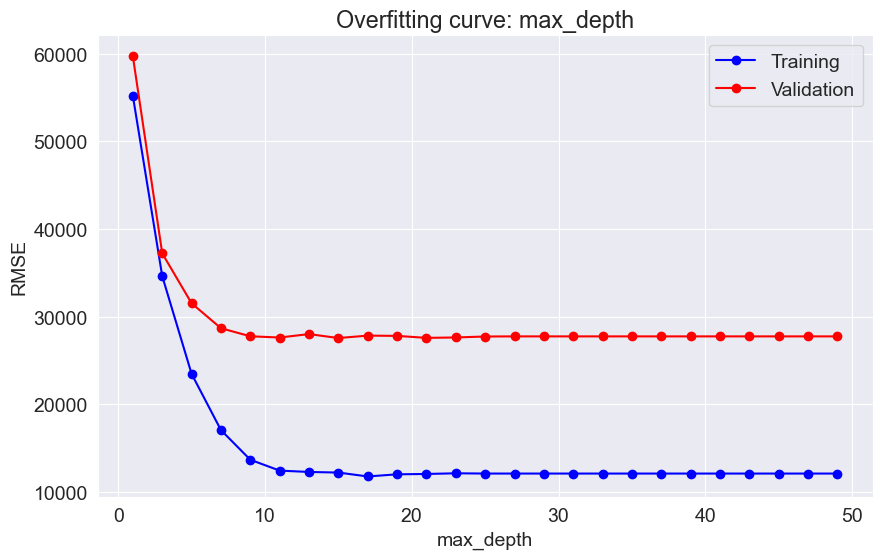

In [540]:
test_param_and_plot('max_depth', list(range(1,50,2)))

In [544]:
temp_best_accs

(12106.483608521496, 27752.591203718952)

In [546]:
# change the hyperparameters of model in function 
def test_params(**params):
    model = RandomForestRegressor(random_state=42, n_jobs=-1, n_estimators = 76, max_depth = 15,  **params).fit(train_inputs, train_targets)
    train_rmse = root_mean_squared_error(model.predict(train_inputs), train_targets)
    val_rmse = root_mean_squared_error(model.predict(val_inputs), val_targets)
    return train_rmse, val_rmse

# Let's create a temp best model to compare models with other tuned hyperparameters.
temp_best_model = RandomForestRegressor(random_state=42, n_jobs=-1, n_estimators = 76, max_depth = 15 ).fit(train_inputs, train_targets)
temp_best_train_rmse = root_mean_squared_error(temp_best_model.predict(train_inputs), train_targets)
temp_best_val_rmse = root_mean_squared_error(temp_best_model.predict(val_inputs), val_targets)
temp_best_accs = temp_best_train_rmse, temp_best_val_rmse
temp_best_accs

(12220.009271250921, 27563.845094601682)

## 7.4 min_samples_split

By default, the decision tree classifier tries to split every node that has 2 or more. You can increase the values of these arguments to change this behavior and reduce overfitting, especially for very large datasets.

Best Value of Hyperparameter: 
min_samples_split = 6 
train_RMSE = 13967.318233238182 
val_RMSE = 27274.737622224453


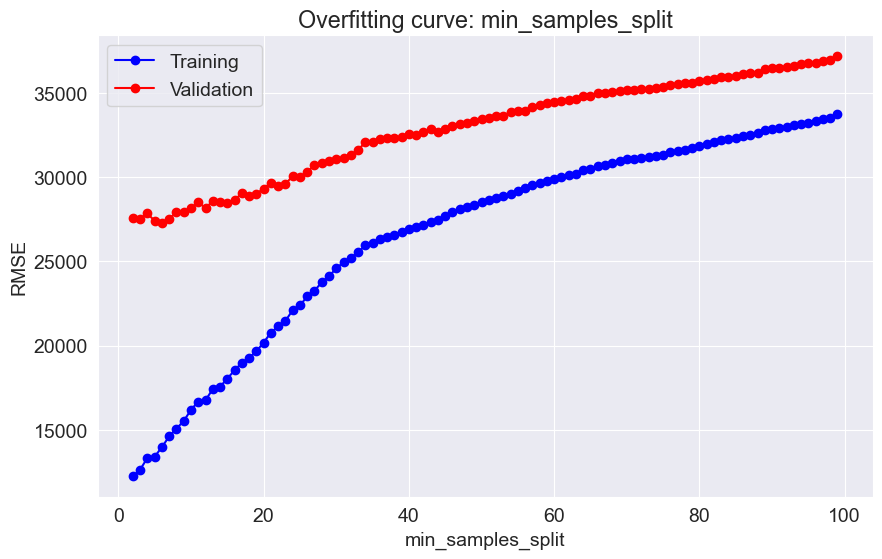

In [565]:
test_param_and_plot('min_samples_split', list(range(2,100,1)))

In [567]:
temp_best_accs

(12220.009271250921, 27563.845094601682)

In [569]:
# change the hyperparameters of model in function 
def test_params(**params):
    model = RandomForestRegressor(random_state=42, n_jobs=-1, n_estimators = 76, max_depth = 15, min_samples_split = 6,  **params).fit(train_inputs, train_targets)
    train_rmse = root_mean_squared_error(model.predict(train_inputs), train_targets)
    val_rmse = root_mean_squared_error(model.predict(val_inputs), val_targets)
    return train_rmse, val_rmse

# Let's create a temp best model to compare models with other tuned hyperparameters.
temp_best_model = RandomForestRegressor(random_state=42, n_jobs=-1, n_estimators = 76, max_depth = 15, min_samples_split = 6).fit(train_inputs, train_targets)
temp_best_train_rmse = root_mean_squared_error(temp_best_model.predict(train_inputs), train_targets)
temp_best_val_rmse = root_mean_squared_error(temp_best_model.predict(val_inputs), val_targets)
temp_best_accs = temp_best_train_rmse, temp_best_val_rmse
temp_best_accs

(13967.31823323818, 27274.737622224453)

## 7.5 min_samples_leaf

Best Value of Hyperparameter: 
min_samples_leaf = 2 
train_RMSE = 15310.290613732863 
val_RMSE = 27349.72226071821


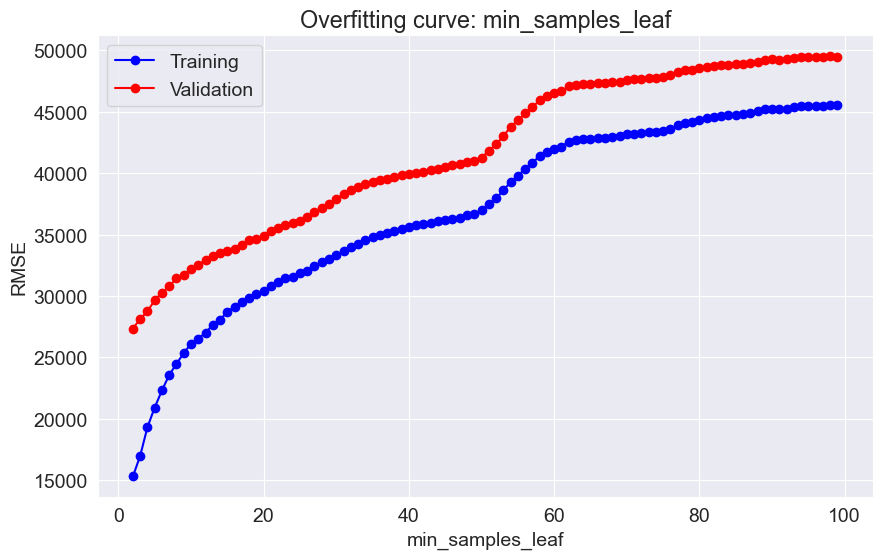

In [572]:
test_param_and_plot('min_samples_leaf', list(range(2,100,1)))

In [574]:
# change the hyperparameters of model in function 
def test_params(**params):
    model = RandomForestRegressor(random_state=42, n_jobs=-1,
                                  n_estimators = 76,
                                  max_depth = 15,
                                  min_samples_split = 6,
                                  min_samples_leaf = 2,
                                  **params).fit(train_inputs, train_targets)
    train_rmse = root_mean_squared_error(model.predict(train_inputs), train_targets)
    val_rmse = root_mean_squared_error(model.predict(val_inputs), val_targets)
    return train_rmse, val_rmse

# Let's create a temp best model to compare models with other tuned hyperparameters.
temp_best_model = RandomForestRegressor(random_state=42, n_jobs=-1,
                                        n_estimators = 76,
                                        max_depth = 15,
                                        min_samples_split = 6,
                                        min_samples_leaf = 2).fit(train_inputs, train_targets)
temp_best_train_rmse = root_mean_squared_error(temp_best_model.predict(train_inputs), train_targets)
temp_best_val_rmse = root_mean_squared_error(temp_best_model.predict(val_inputs), val_targets)
temp_best_accs = temp_best_train_rmse, temp_best_val_rmse
temp_best_accs

(15310.290613732863, 27349.72226071821)

## 7.6 max_leaf_nodes

Best Value of Hyperparameter: 
max_leaf_nodes = 490 
train_RMSE = 15262.292011390206 
val_RMSE = 27399.059906005674


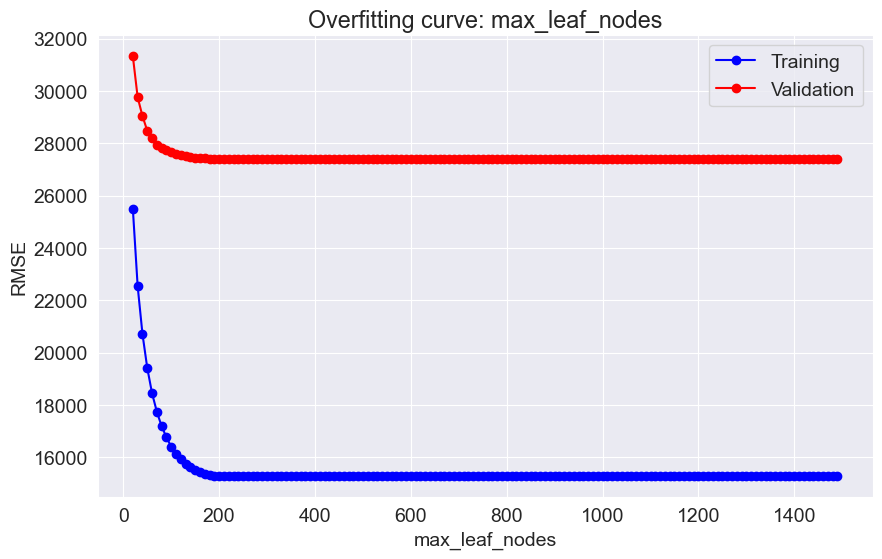

In [580]:
test_param_and_plot('max_leaf_nodes', list(range(20,1500,10)))

There is no improvement in validation rmse so we can stop here

# 8 - The Best Model

## 8.1 - Training the best model

In [601]:
# Create the model with custom hyperparameters
rf2 = RandomForestRegressor(random_state=42, n_jobs=-1,
                            n_estimators = 76,
                            max_depth = 15,
                            min_samples_split = 6,
                            min_samples_leaf = 2)
rf2.fit(train_inputs, train_targets)

RandomForestRegressor(max_depth=15, min_samples_leaf=2, min_samples_split=6,
                      n_estimators=76, n_jobs=-1, random_state=42)

In [ ]:
print('Train RMSE: {}, Validation RMSE: {}'.format(rf1_train_rmse, rf1_val_rmse))

## 8.2 - Generating Predictions and Evaluating the Best Model

In [613]:
rf2_train_preds = rf2.predict(train_inputs)
rf2_train_preds

array([189003.31928875, 172937.85286956, 107649.73774365, ...,
       118339.49802537, 175171.51105627, 185273.92637297])

In [615]:
rf2_train_rmse = root_mean_squared_error(train_targets, rf2_train_preds)
rf2_train_rmse

15310.290613732863

In [617]:
rf2_val_preds = rf2.predict(val_inputs)
rf2_val_preds

array([142448.90763385, 310461.06103137, 118833.26127345, 147830.59684248,
       320675.99772267,  84966.56411388, 206384.90842732, 152669.26728754,
        84806.13026411, 128570.93588944, 156483.78025982, 121972.81855936,
       110479.81065353, 211120.90086153, 176486.09301207, 129142.52659836,
       191654.46560794, 134994.3110214 , 114998.61017126, 209214.69921694,
       163113.19601689, 220956.34480994, 178229.97069177, 122366.4214477 ,
       196665.62987569, 170703.11309998, 185463.01991476, 107305.33970411,
       176609.68207052, 194468.0038586 , 124142.26504234, 255719.19711067,
       166441.25955214, 112603.02180641, 257603.28426763, 145030.85887796,
       139102.82211115, 201162.91202585, 318909.45885405, 107423.23550543,
       122447.79377421, 238092.84932824, 118905.94934557, 367816.86083113,
       136167.77117984, 155398.26615592, 113003.30939139, 124963.47167973,
       381582.72333865, 146251.16060905, 121294.88356904, 202981.04856364,
       124344.92966989, 3

In [621]:
rf2_val_rmse = root_mean_squared_error(val_targets, rf2_val_preds)
rf2_val_rmse

27349.722260718205

In [623]:
print('Train RMSE: {}, Validation RMSE: {}'.format(rf2_train_rmse, rf2_val_rmse))

Train RMSE: 15310.290613732863, Validation RMSE: 27349.722260718205


## 8.3 - Feature Importance

In [626]:
rf2_importance_df = pd.DataFrame({
    'feature': train_inputs.columns,
    'importance': rf2.feature_importances_
}).sort_values('importance', ascending=False)

rf2_importance_df

,feature,importance
3,OverallQual,0.563158
15,GrLivArea,0.121066
11,TotalBsmtSF,0.036487
13,2ndFlrSF,0.029522
8,BsmtFinSF1,0.026851
...,...,...
88,Neighborhood_Veenker,0.000000
160,Exterior2nd_Stucco,0.000000
159,Exterior2nd_Stone,0.000000
157,Exterior2nd_Other,0.000000


<Axes: xlabel='importance', ylabel='feature'>

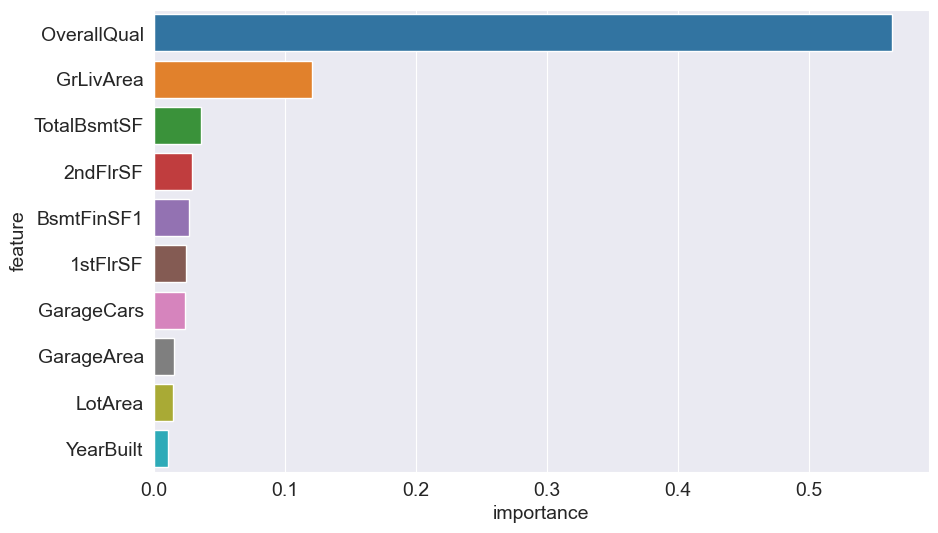

In [630]:
sns.barplot(data=rf2_importance_df.head(10), x='importance', y='feature')

# 9 - Making Predictions on the Test Set

In [633]:
test_df = pd.read_csv('house-prices/test.csv')
test_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,Hd

In [635]:
# First, we need to reapply all the preprocessing steps.
test_df[numeric_cols] = imputer.transform(test_df[numeric_cols])
test_df[numeric_cols] = scaler.transform(test_df[numeric_cols])
test_df[encoded_cols] = encoder.transform(test_df[categorical_cols])

C:\Users\user\AppData\Local\Temp\ipykernel_12664\3387884280.py:4: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\user\AppData\Local\Temp\ipykernel_12664\3387884280.py:4: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\user\AppData\Local\Temp\ipykernel_12664\3387884280.py:4: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented fra

In [637]:
test_inputs = test_df[numeric_cols + encoded_cols]

In [639]:
test_preds = rf2.predict(test_inputs)

In [641]:
submission_df = pd.read_csv('house-prices/sample_submission.csv')

In [643]:
submission_df

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659


In [645]:
submission_df['SalePrice'] = test_preds

In [647]:
submission_df.to_csv('submission.csv', index=False)

# 10 - Results on kaggle.com

My percentile is 0.15064 on https://www.kaggle.com/c/house-prices-advanced-regression-techniques/submissions